Evaluación de Clasificadores - Cálculo de varias Métricas en varios Modelos de aprendizaje - Dataset Diabetes

In [89]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
diabetes = pd.read_csv('diabetes.csv') 
diabetes.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [25]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
print("Diabetes data set dimensions : {}".format(diabetes.shape))
diabetes.groupby('Outcome').size()


Diabetes data set dimensions : (768, 9)


Outcome
0    500
1    268
dtype: int64

In [34]:
#We will remove the rows which the “BloodPressure”, “BMI” and “Glucose” are zero.
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]
print(diabetes_mod.shape)

(724, 9)


In [35]:
#we will use all the features available. We separate the data set into features and the response that we are going to predict. 
#We will assign the features to the X variable and the response to the y variable.
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_mod[feature_names]
y = diabetes_mod.Outcome

In [36]:
#We will import the necessary libraries for the notebook. We import 7 classifiers namely K-Nearest Neighbors, Support Vector Classifier, Logistic Regression, 
#Gaussian Naive Bayes, Random Forest, and Gradient Boost to be contenders for the best classifier.from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression(max_iter=300000)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [42]:
#To avoid some problems
#Train/Test Split
#K-Fold Cross-Validation
#We will import “train_test_split” for train/test split and “cross_val_score” for k-fold cross-validation. “accuracy_score” is to evaluate the accuracy of the model in the train/test split method.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# stratify (a process where each response class should be represented with equal proportions in each of the portions)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes_mod.Outcome, random_state=0)

In [63]:
names = []
scores_a = []
scores_p = []
scores_r = []
scores_f1 = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores_a.append(metrics.accuracy_score(y_test, y_pred))
    scores_p.append(metrics.precision_score(y_test, y_pred))
    scores_r.append(metrics.recall_score(y_test, y_pred))
    scores_f1.append(metrics.f1_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score a': scores_a, 'Score p': scores_p, 'Score r':scores_r, 'Score f1':scores_f1})
print(tr_split)

  Name   Score a   Score p   Score r  Score f1
0  KNN  0.729282  0.627451  0.516129  0.566372
1  SVC  0.740331  0.674419  0.467742  0.552381
2   LR  0.779006  0.703704  0.612903  0.655172
3   DT  0.718232  0.593220  0.564516  0.578512
4  GNB  0.734807  0.612903  0.612903  0.612903
5   RF  0.756906  0.666667  0.580645  0.620690
6   GB  0.773481  0.690909  0.612903  0.649573


In [86]:
#Using K-Fold cross validation
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

names = []
scores_a = []
scores_p = []
scores_r = []
scores_f1 = []
for name, model in models: 
    kfold = KFold(n_splits=10, random_state=10, shuffle=True) 
    scoring = ['accuracy', 'precision','recall','f1']
    results = cross_validate(model, X, y, cv=kfold, scoring=scoring)
    names.append(name)
    scores_a.append(np.mean(results['test_accuracy']))
    scores_p.append(np.mean(results['test_precision']))
    scores_r.append(np.mean(results['test_recall']))
    scores_f1.append(np.mean(results['test_f1']))
    
kf_cross_val = pd.DataFrame({'Name': names, 'Score_a': scores_a, 'Score_p':scores_p, 'Score_r':scores_r, 'Score_f1':scores_f1})
print(kf_cross_val)

  Name   Score_a   Score_p   Score_r  Score_f1
0  KNN  0.707116  0.605154  0.510789  0.542335
1  SVC  0.752778  0.723899  0.468086  0.563540
2   LR  0.766591  0.718880  0.558598  0.621576
3   DT  0.700228  0.559749  0.567116  0.559332
4  GNB  0.752683  0.654678  0.617257  0.631044
5   RF  0.772184  0.697958  0.588237  0.633277
6   GB  0.752721  0.663968  0.586204  0.615637


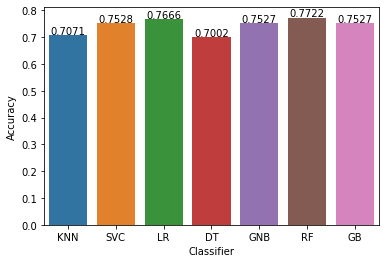

In [87]:
#We can plot the accuracy scores using seaborn
axis = sns.barplot(x = kf_cross_val['Name'], y = kf_cross_val['Score_a'], data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

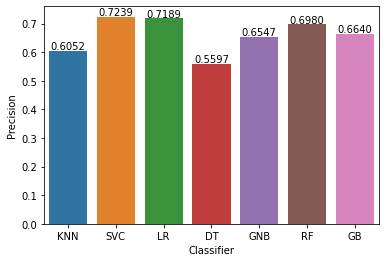

In [88]:
#We can plot the accuracy scores using seaborn
axis = sns.barplot(x = kf_cross_val['Name'], y = kf_cross_val['Score_p'], data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Precision')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()